In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, roc_auc_score,
                           confusion_matrix, classification_report)

In [2]:
df = pd.read_csv(r'c:\Users\sohila\OneDrive\Drive\customer_churn_data.csv')
print(df.head(4))

  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1                  Yes                   No                  Yes   
2                  Yes                  Yes                   No   
3     

In [3]:
print(df.tail(1))

     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5879   CUST5879  Female              1     Yes         No      23   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
5879          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5879  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling PaymentMethod  \
5879  No internet service  Month-to-month               No  Mailed check   

     MonthlyCharges  TotalCharges  Churn  
5879          25.45        585.35    Yes  

[1 rows x 21 columns]


In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


In [6]:
df.duplicated().sum()

0

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [8]:
print(df.shape)

(5880, 21)


In [9]:
print("Missing Data: ", df.isnull().sum())

Missing Data:  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
print("Cleaned Dataset: ", df.dropna(inplace=True))

Cleaned Dataset:  None


In [11]:
print("Missing Data: ", df.isnull().sum())

Missing Data:  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
print( df.drop_duplicates().sum())

customerID          CUST0000CUST0001CUST0002CUST0003CUST0004CUST00...
gender              MaleFemaleMaleMaleMaleFemaleMaleMaleMaleFemale...
SeniorCitizen                                                    2944
Partner             NoYesNoNoNoYesYesYesNoNoYesYesNoNoYesNoNoNoNoN...
Dependents          YesNoNoNoNoNoNoYesNoNoNoNoYesNoYesYesNoNoYesYe...
tenure                                                         214909
PhoneService        NoNoYesYesYesYesNoYesNoNoYesYesYesYesYesNoYesN...
MultipleLines       No phone serviceNo phone serviceNoYesYesNoNo p...
InternetService     NoDSLDSLDSLDSLDSLDSLDSLDSLNoFiber opticDSLNoDS...
OnlineSecurity      No internet serviceYesNoYesNoNoNoNoYesNo inter...
OnlineBackup        No internet serviceNoYesNoNoNoNoYesNoNo intern...
DeviceProtection    No internet serviceYesYesYesNoNoNoYesNoNo inte...
TechSupport         No internet serviceNoYesNoYesYesYesYesYesNo in...
StreamingTV         No internet serviceYesNoNoNoYesNoNoNoNo intern...
StreamingMovies     

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\sohila\AppData\Local\Temp\ipykernel_30432\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert to binary

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [16]:
# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Model Performance Metrics:
Accuracy: 0.5051
Precision: 0.5095
Recall: 0.4527
F1 Score: 0.4794
ROC AUC: 0.5043


In [17]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[326 258]
 [324 268]]


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53       584
           1       0.51      0.45      0.48       592

    accuracy                           0.51      1176
   macro avg       0.51      0.51      0.50      1176
weighted avg       0.51      0.51      0.50      1176



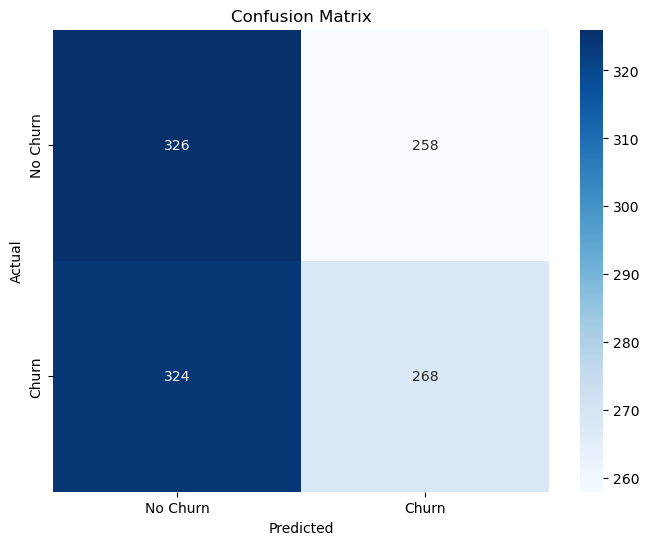

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\sohila\AppData\Local\Temp\ipykernel_30432\3121092142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Churn'] = numerical_data['Churn'].map({'Yes': 1, 'No': 0})


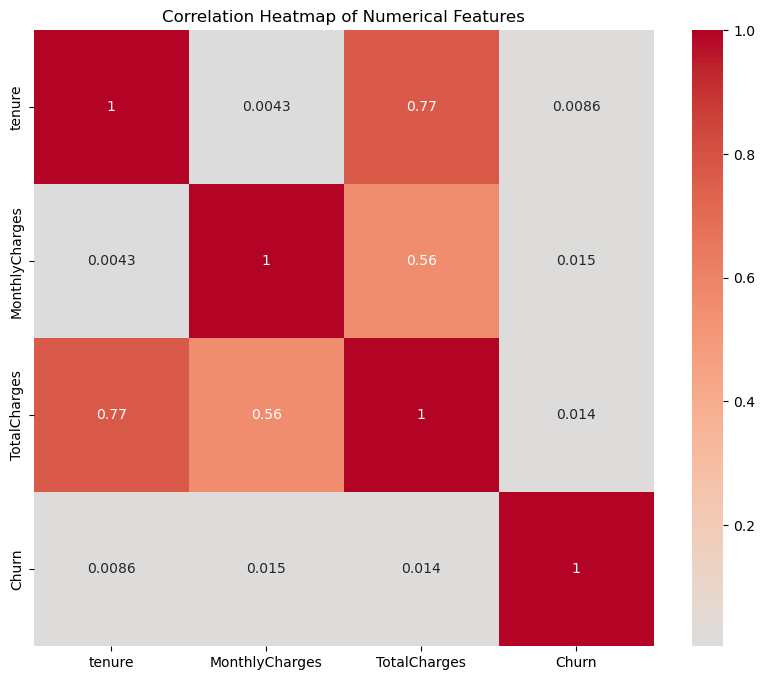

In [20]:
numerical_data = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
numerical_data['Churn'] = numerical_data['Churn'].map({'Yes': 1, 'No': 0})
# Calculate correlation matrix
corr = numerical_data.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\sohila\AppData\Local\Temp\ipykernel_30432\2582105500.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


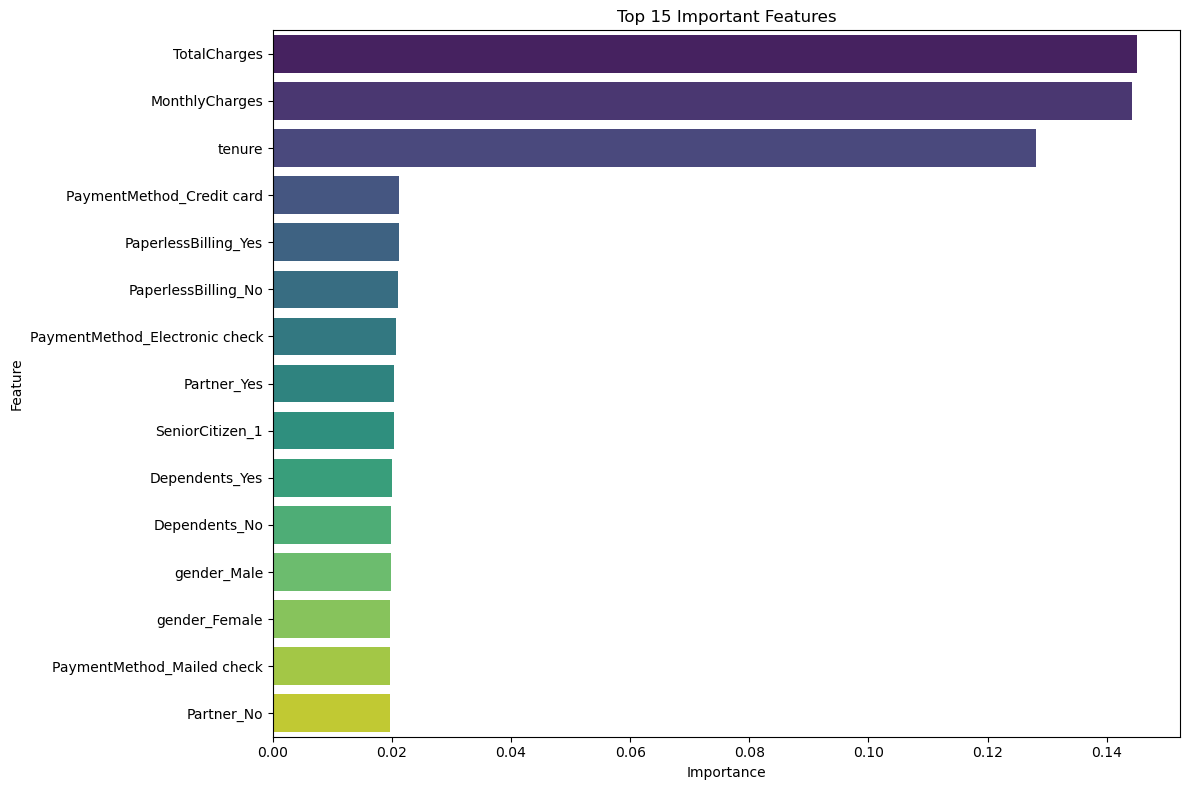

In [21]:
importances = model.named_steps['classifier'].feature_importances_

# Get feature names after one-hot encoding
ohe = (model.named_steps['preprocessor']
       .named_transformers_['cat']
       .named_steps['onehot'])
cat_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)

# Create DataFrame and sort
feature_importance = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

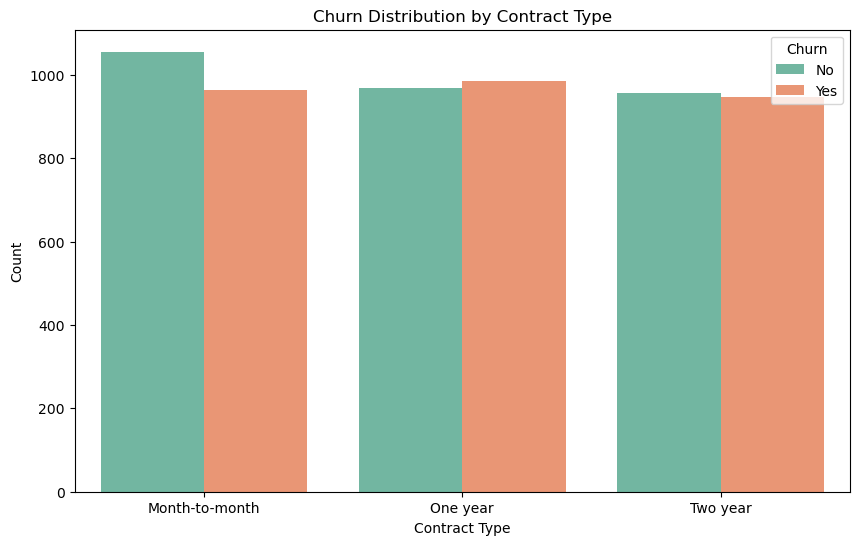

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

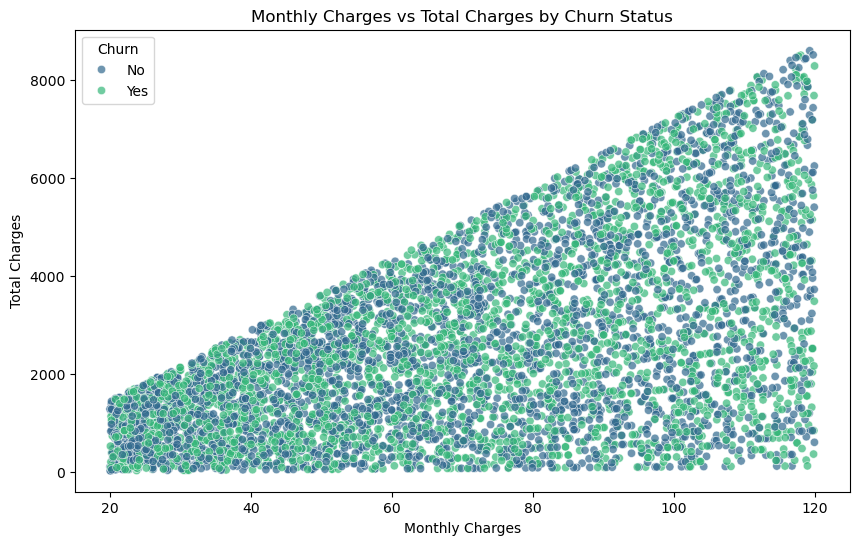

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', 
                data=df, palette='viridis', alpha=0.7)
plt.title('Monthly Charges vs Total Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()